## 4종 ASMR 음원 데이터 분류 잘 되는지 보기 
1. 데이터 10개씩 4세트 불러오기
2. mfcc변환
3. PCA
4. T-sne

In [ ]:
import librosa
import IPython.display as ipd

path = '/content/drive/MyDrive/Colab Notebooks/[해커톤]DeepASMR/Dataset/asmr'
path1 = path +'/bird'
path2 = path +'/rain'
path3 = path +'/wave'
path4 = path +'/wood'

dic={}
birdlist = []
rainlist = []
wavelist = []
woodlist = []

# label = []
bird_label = 'bird'
rain_label = 'rain'
wave_label = 'wave'
wood_label = 'wood'

num_data = 10
for i in range(10,10+num_data):
  bird, _ =librosa.load(path1+f'/{i}.wav',sr=None,duration=5.0)
  birdlist.append(bird)
  rain, _ =librosa.load(path2+f'/{i}.wav',sr=None,duration=5.0)
  rainlist.append(rain)
  wave, _ =librosa.load(path3+f'/{i}.wav',sr=None,duration=5.0)
  wavelist.append(wave)
  wood, _ =librosa.load(path4+f'/{i}.wav',sr=None,duration=5.0)
  woodlist.append(wood)

label = [bird_label]*num_data+[rain_label]*num_data + [wave_label]*num_data+[wood_label]*num_data


print(label)
print(_)

# y, sr = librosa.load(midi_file, sr=None, offset=offset, duration = 2.0)

['bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'bird', 'rain', 'rain', 'rain', 'rain', 'rain', 'rain', 'rain', 'rain', 'rain', 'rain', 'wave', 'wave', 'wave', 'wave', 'wave', 'wave', 'wave', 'wave', 'wave', 'wave', 'wood', 'wood', 'wood', 'wood', 'wood', 'wood', 'wood', 'wood', 'wood', 'wood']
44100


In [ ]:
wholelist = birdlist + rainlist + wavelist + woodlist


In [ ]:
len(wholelist)

40

- sr : 44100
- 음원길이 : (220500,)

In [ ]:
for i in range(len(wholelist)):
  assert wholelist[i].shape == (220500,)

In [ ]:
audio_mfcc = []
for y in wholelist : 
  #mfcc() method 소환
  ret = librosa.feature.mfcc(y=y, sr = _)
  audio_mfcc.append(ret)
len(audio_mfcc)

40

In [ ]:
audio_mfcc[0].shape

(20, 431)

mfcc = (20,431)

In [ ]:
for i in range(len(audio_mfcc)):
  assert audio_mfcc[i].shape ==(20,431)
  audio_mfcc[i]=audio_mfcc[i].reshape(-1)

In [ ]:
audio_mfcc[0].shape

(8620,)

pandas dataframe : (40,8620)

In [ ]:
import pandas as pd
df = pd.DataFrame(audio_mfcc)
df['name']=label
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,8581,8582,8583,8584,8585,8586,8587,8588,8589,8590,8591,8592,8593,8594,8595,8596,8597,8598,8599,8600,8601,8602,8603,8604,8605,8606,8607,8608,8609,8610,8611,8612,8613,8614,8615,8616,8617,8618,8619,name
0,-584.233582,-584.233582,-584.233582,-584.233582,-584.233582,-584.233582,-584.233582,-584.233582,-584.233582,-584.233582,-584.233582,-584.233582,-584.233582,-456.956360,-357.779083,-342.702271,-384.455475,-442.670685,-487.635132,-524.108032,-526.871643,-526.063354,-524.530518,-522.868225,-523.529297,-522.659851,-506.856232,-503.318359,-514.037659,-526.578003,-529.661621,-529.190063,-531.490295,-532.468933,-535.535583,-540.882080,-543.931641,-549.866150,-555.468628,-559.864929,...,10.410215,10.263428,10.097760,10.276327,10.388259,9.954326,10.149969,10.394520,10.515188,10.879603,10.844630,9.254950,9.050200,8.717237,7.515912,4.716805,4.255819,6.630163,5.411461,5.040015,6.616353,4.513566,6.075301,9.112561,13.774286,7.072625,5.985302,1.872951,4.092326,2.784992,0.966055,0.861998,6.127221,8.196173,2.157757,-1.487964,4.435466,0.805401,2.558582,bird
1,-398.494019,-335.648926,-320.452698,-348.848816,-374.339142,-373.341187,-397.853455,-423.556793,-417.317383,-410.058411,-396.417664,-397.397766,-403.009766,-403.690216,-405.170807,-418.008331,-420.825073,-417.848663,-421.813354,-423.728088,-425.054108,-422.440460,-422.097687,-423.623932,-425.599121,-421.291870,-415.988434,-419.225067,-426.652008,-425.932526,-429.416321,-429.861572,-433.122314,-431.571991,-429.319977,-429.146301,-430.790283,-433.195435,-432.817261,-403.285034,...,-5.933249,-4.516924,-3.962178,-0.518972,-4.643088,-5.477398,-5.699460,-5.634877,-1.229952,4.151893,12.129980,7.916612,3.469417,-1.347643,-0.791930,-1.627605,-7.903615,-3.729344,7.371681,-8.799071,-13.028130,-7.225087,-5.292929,1.472287,5.689658,8.406860,1.806292,-3.155900,-2.351225,5.244302,5.990345,6.734946,5.288219,3.970562,2.326089,4.189168,-2.130733,1.607239,-0.442757,bird
2,-422.449677,-419.182495,-422.236237,-421.883667,-423.074951,-419.251862,-421.443451,-420.135010,-417.114105,-425.290100,-425.769348,-419.444916,-416.082306,-420.964508,-419.876251,-417.765564,-415.034546,-398.801483,-392.331787,-404.836487,-407.083801,-389.934204,-381.357391,-389.072174,-404.174011,-408.798309,-408.150574,-409.363800,-424.493744,-424.642181,-427.410950,-423.332611,-424.984192,-432.396149,-427.089935,-419.344696,-419.117065,-420.593170,-422.253052,-422.486115,...,0.668797,-2.780485,-2.284773,-6.130774,-5.922968,-11.239211,-9.472403,-3.622944,-3.577096,-3.166049,-2.033744,-3.487619,-2.314955,-3.968276,1.270559,-5.845066,-11.667192,-11.662783,-11.984161,-13.205066,-14.122295,-15.514019,-12.921340,-9.000763,-5.539021,-8.249389,-6.950001,-7.006012,-12.732566,-8.591566,-5.663210,-4.387386,-4.437156,-3.404498,-3.953436,-2.959330,0.579362,-1.784210,-3.881013,bird
3,-451.454865,-444.741455,-443.140106,-448.632324,-450.051025,-451.407654,-448.038116,-440.480835,-440.832092,-442.408539,-446.733093,-432.482361,-421.193512,-428.854828,-438.551849,-427.614288,-425.469055,-431.953491,-440.258545,-440.069183,-433.143372,-436.995605,-438.944885,-414.115326,-408.872284,-424.747955,-447.652069,-438.662659,-432.141144,-428.754425,-423.500488,-424.383423,-437.321899,-444.491791,-446.822632,-438.945984,-431.243896,-427.000031,-429.206299,-429.984344,...,-8.712473,-7.555401,-8.677950,-7.347908,-2.601477,-1.193147,4.018419,1.228366,0.071964,-8.782658,-7.512755,-5.330051,-3.056198,-3.402783,-9.957005,-9.078106,-9.242096,-9.271873,-8.396164,-8.343601,-7.250881,-10.326962,-11.353535,-10.097982,-14.180229,-15.638308,-15.152124,-10.800773,-7.055549,-6.841685,-9.413237,-4.472833,-7.828753,-7.800224,-4.153892,-4.426501,-5.619104,-6.114728,-12.956833,bird
4,-431.552124,-420.105438,-419.948517,-422.317871,-424.128113,-423.271423,-420.963318,-418.636108,-417.511841,-415.871582,-420.395172,-424.702209,-423.247437,-416.771088,-405.787445,-410.61712

특정 칼럼 제외하고 조회

In [ ]:
[df.columns.difference(['name'])]

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       8610, 8611, 8612, 8613, 8614, 8615, 8616, 8617, 8618, 8619],
      dtype='object', length=8620)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
pca_2d = pca.fit_transform(df[df.columns.difference(['name'])])
pca_2d.shape

(40, 2)

In [ ]:
len(pca_2d)

40

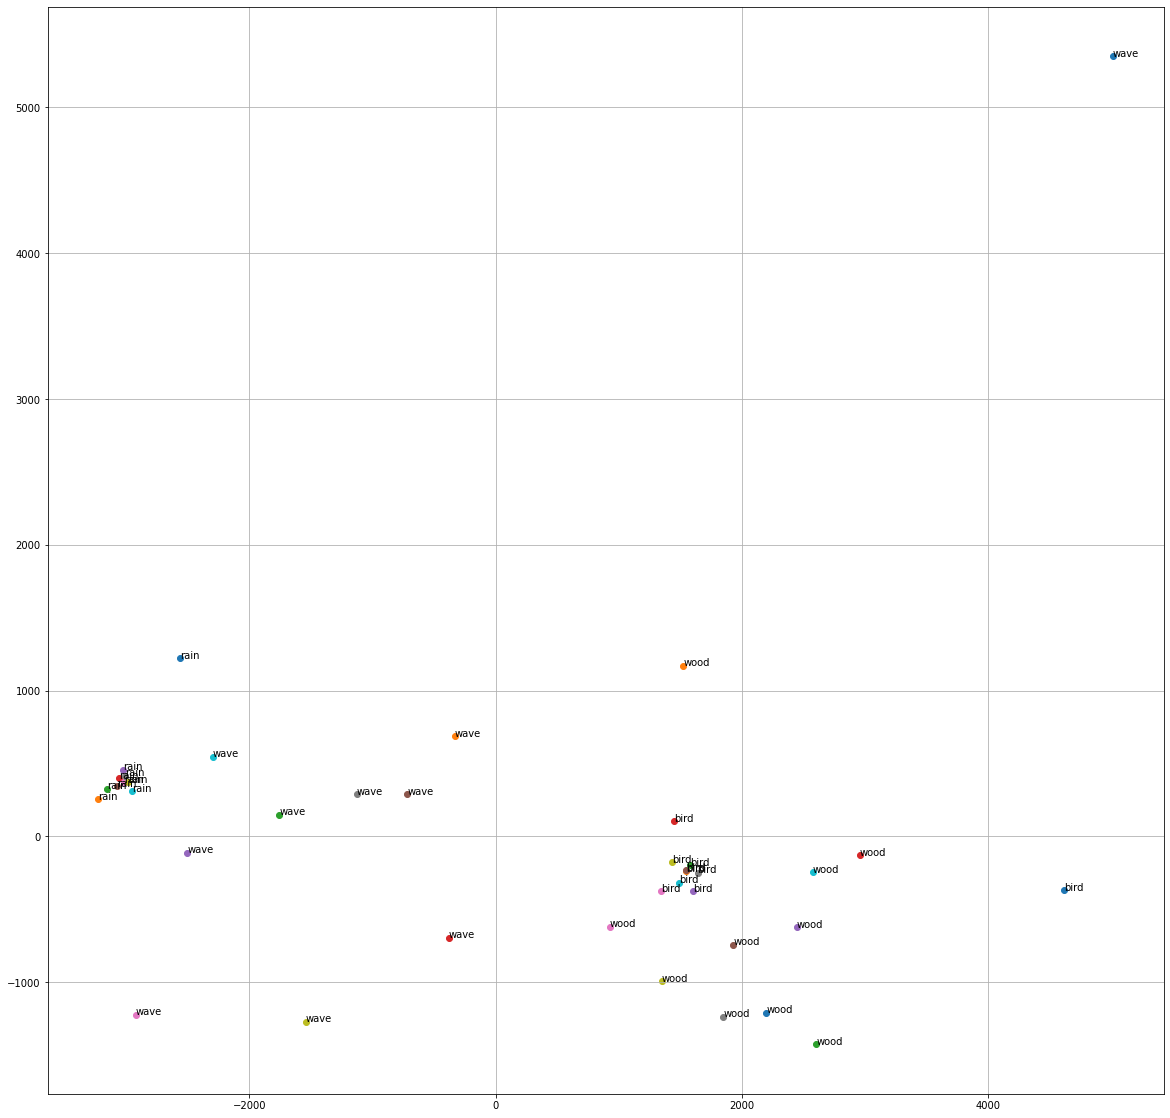

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
for i in range(len(pca_2d)):
  plt.scatter(pca_2d[i][0], pca_2d[i][1],marker = 'o')
  plt.annotate(label[i],(pca_2d[i][0], pca_2d[i][1])) 
  plt.grid(True)
  # plt.legend(fontsize=10, loc='lower right')

T-Sne 시각화

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
value_2d = tsne.fit_transform(df[df.columns.difference(['name'])])
print(value_2d[0])
value_2d

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[72.43473 45.89023]


array([[ 72.43473   ,  45.89023   ],
       [ 30.36621   ,  27.68482   ],
       [ 40.633694  ,  13.717161  ],
       [ -5.183435  ,  25.40938   ],
       [ 20.707703  ,  43.607082  ],
       [ 38.484634  ,  43.27618   ],
       [ 19.53909   ,  13.06582   ],
       [ 50.207798  ,  30.06218   ],
       [ 12.669471  ,  28.069027  ],
       [  1.8077973 ,  42.818176  ],
       [ 24.834679  , -69.66623   ],
       [  3.5341678 , -65.90067   ],
       [ -2.4323046 , -49.850075  ],
       [-15.421243  , -36.51621   ],
       [ -4.7885313 , -83.20837   ],
       [ 17.275993  , -48.90041   ],
       [-35.803333  , -44.897778  ],
       [-19.319054  , -70.383255  ],
       [-20.16991   , -53.35568   ],
       [-48.33064   , -30.84964   ],
       [ 88.737686  ,  24.48412   ],
       [  8.070137  ,  -9.980623  ],
       [-36.65854   ,  -6.502327  ],
       [ -0.18325335,   5.532062  ],
       [  2.9794903 , -31.02995   ],
       [-19.672678  ,   4.1813545 ],
       [-41.40329   , -65.22024   ],
 

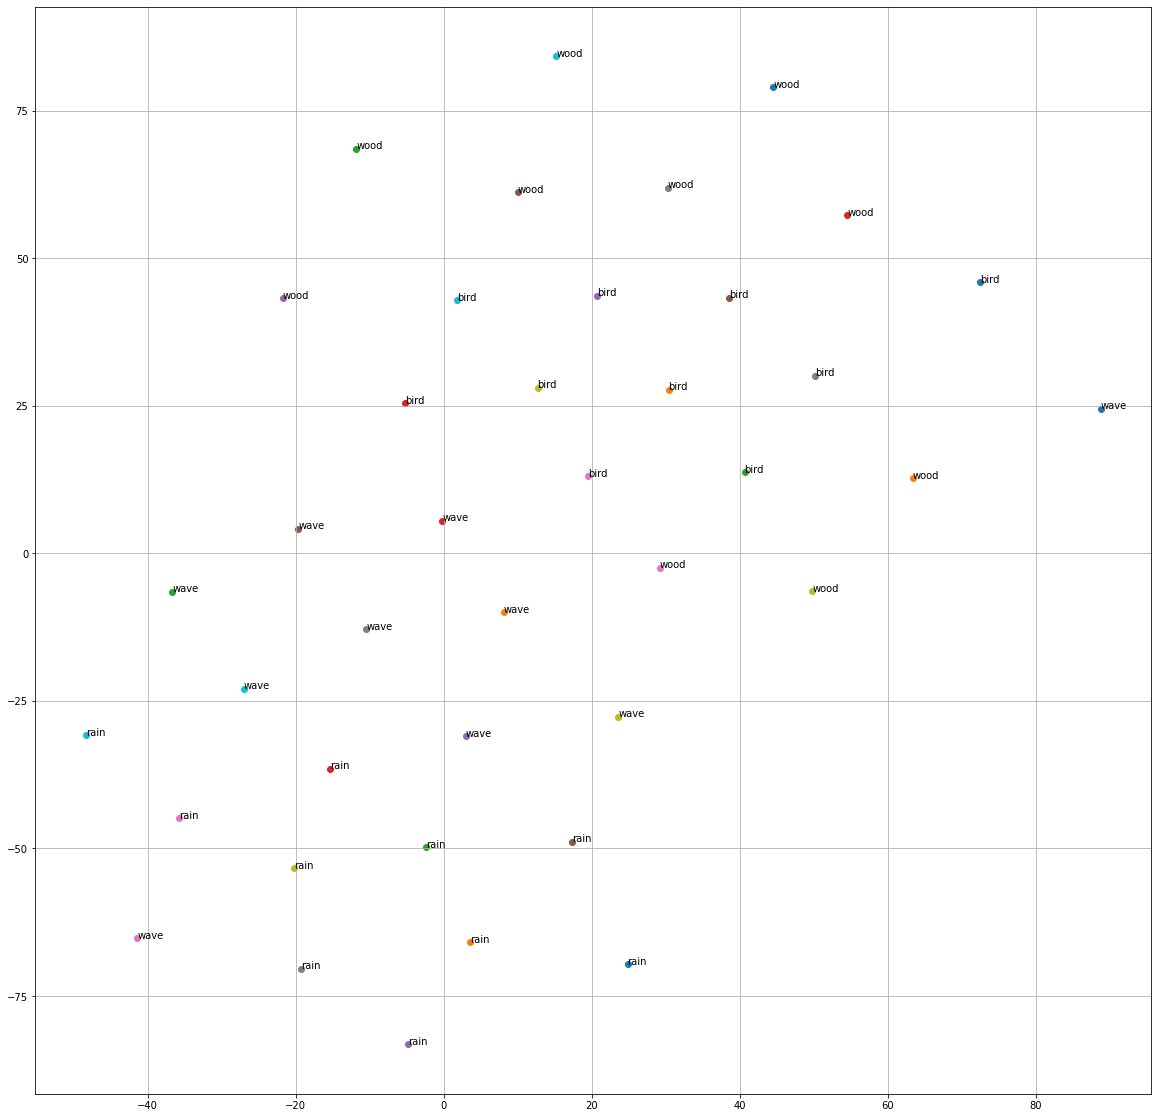

In [ ]:
plt.figure(figsize=(20,20))
for i in range(len(value_2d)):
  plt.scatter(value_2d[i][0], value_2d[i][1],marker = 'o')
  plt.annotate(label[i],(value_2d[i][0], value_2d[i][1])) 
  plt.grid(True)



## K-means clustering
- 생각해보니 고차원이라 일단 차원축소부터 하고 봐야함. 현재로썬 힘듦

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(df[df.columns.difference(['name'])])
kmeans

KMeans(n_clusters=4, random_state=0)

In [ ]:
centroids = kmeans.cluster_centers_
print(centroids)

[[-8.82267273e+02 -8.82267273e+02 -8.82267273e+02 ... -9.15246105e+00
  -7.49093628e+00 -4.71986485e+00]
 [-4.49715562e+02 -4.43429549e+02 -4.25738630e+02 ...  9.71368048e-01
   9.82978782e-01  8.22570661e-01]
 [-2.73340476e+02 -2.68050178e+02 -2.69824244e+02 ... -7.68295279e+00
  -7.92170201e+00 -5.41246647e+00]
 [-2.60593529e+02 -2.58676110e+02 -2.67087357e+02 ... -1.37791085e+01
  -1.25077593e+01 -6.45925566e+00]]


## 차원축소 및 Clustering

- K-means clustering은 이차원일때만 쓰자. 
- PCA는 특정 feature의 고윳값을 남겨 주므로 유용하다.
- t-SNE는 거리 유지에 좋다(시각화용).